In [1]:
# 구글드라이브에서 데이터를 사용하기 위해서 Mount를 하는 코드입니다.
# 구글 계정으로 로그인하여, 구글드라이브에 있는 실습용 데이터를 사용할 수 있게 인증하는 방식입니다.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 실습용 데이터셋이 있는 경로입니다. (*** 구글드라이브 내 경로 ***)
# 본인의 경로에 맞게 수정해서 사용하세요. (자세한 사용법은 함께 제공되는 튜토리얼 영상을 확인하세요)
base_path = "/content/drive/MyDrive/Colab Notebooks/[초격차] 데이터 분석/input"

In [3]:
# 정형 데이터를 불러오고 조작하기 위해 Pandas 라이브러리를 사용합니다.
import pandas as pd
# 지정한 경로에 있는 데이터를 불러옵니다. csv 파일이냐 xlsx 파일이냐에 따라 사용하는 함수가 다릅니다.
# 숫자인데 특수문자가 포함되어 있어 문자열이 된 데이터들을 전처리합니다.

data = pd.read_excel(base_path + "/#23_검색광고 키워드 데이터.xlsx")
data["월간검색수(PC)"] = data["월간검색수(PC)"].str.replace(",", "").replace("< 10", 5).astype(int)
data["월간검색수(모바일)"] = data["월간검색수(모바일)"].str.replace(",", "").replace("< 10", 5).astype(int)
data["월평균클릭수(모바일)"] = data["월평균클릭수(모바일)"].str.replace(",", "").astype(float)
data["월평균클릭률(PC)"] = data["월평균클릭률(PC)"].str.replace("%", "").astype(float)
data["월평균클릭률(모바일)"] = data["월평균클릭률(모바일)"].str.replace("%", "").astype(float)
data

,연관키워드,월간검색수(PC),월간검색수(모바일),월평균클릭수(PC),월평균클릭수(모바일),월평균클릭률(PC),월평균클릭률(모바일),경쟁정도,월평균노출광고수
0,휴대폰,10000,46100,172.2,1281.9,1.87,3.00,중간,15
1,핸드폰싸게사는법,4430,20800,117.9,936.2,2.89,4.80,중간,15
2,갤럭시노트20,84600,547600,557.2,6177.0,0.70,1.18,중간,15
3,휴대폰추천,1900,8340,28.6,216.8,1.65,2.78,중간,15
4,공짜폰,3430,12900,87.2,609.7,2.77,5.19,중간,15
...,...,...,...,...,...,...,...,...,...
538,요즘휴대폰,20,70,0.0,0.0,0.00,0.00,높음,3
539,핸드폰특가,90,280,2.3,22.3,2.85,7.84,중간,15
540,휴대폰구매사이트,50,80,2.1,4.8,4.79,5.40,높음,14
541,핸드폰공짜,30,180,1.2,11.8,3.75,7.44,높음,15


In [4]:
# 불러온 데이터셋에 대한 전반적인 정보를 확인하는 함수입니다.
# row수, column수, 결측치 수, column별 data type을 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   연관키워드        543 non-null    object 
 1   월간검색수(PC)    543 non-null    int64  
 2   월간검색수(모바일)   543 non-null    int64  
 3   월평균클릭수(PC)   543 non-null    float64
 4   월평균클릭수(모바일)  543 non-null    float64
 5   월평균클릭률(PC)   543 non-null    float64
 6   월평균클릭률(모바일)  543 non-null    float64
 7   경쟁정도         543 non-null    object 
 8   월평균노출광고수     543 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 38.3+ KB


In [5]:
# 데이터의 통계량을 확인합니다.
data.describe()

,월간검색수(PC),월간검색수(모바일),월평균클릭수(PC),월평균클릭수(모바일),월평균클릭률(PC),월평균클릭률(모바일),월평균노출광고수
count,543.000000,5.430000e+02,543.000000,543.000000,543.000000,543.000000,543.000000
mean,1836.123389,7.128260e+03,6.547698,55.562247,2.544586,2.818508,9.791897
std,23642.398920,8.256238e+04,32.763712,318.318531,6.035579,3.737672,5.711625
min,5.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,3.000000e+01,0.000000,0.000000,0.000000,0.000000,3.000000
50%,40.000000,1.200000e+02,0.500000,1.400000,1.130000,1.370000,13.000000
75%,205.000000,6.650000e+02,2.200000,15.000000,2.860000,4.495000,15.000000
max,530300.000000,1.778400e+06,557.200000,6177.000000,100.000000,33.340000,15.000000


In [6]:
# plotting을 위해 사용하는 parameter들을 사용자로부터 입력받습니다.

# x는 scatterplot의 x축에 표현되는 feature를 의미합니다. data에 존재하는 column중에 x축에 표시하고 싶은 column의 이름을 입력하세요.
# x축 정보는 scatterplot이 나뉘는 기준입니다.
x = input("scatterplot의 x축이 되는 column을 입력하세요 : ")
# y는 scatterplot의 y축에 표현되는 feature를 의미합니다. data에 존재하는 column중에 y축에 표시하고 싶은 column의 이름을 입력하세요.
# y축 정보는 scatterplot에 들어가는 실제값입니다.
y = input("scatterplot의 y축이 되는 column을 입력하세요 : ")
# hue는 scatterplot에서 각 plot마다 색을 다르게 주는 기준이 되는 feature를 의미합니다. data에 존재하는 column중에 hue에 표시하고 싶은 column의 이름을 입력하세요.
# hue는 plot에서 색 정보를 통해서 구분되어 표현되는 column을 의미합니다.
hue = input("scatterplot의 색상 구분의 기준이 되는 column을 입력하세요 : ")

scatterplot의 x축이 되는 column을 입력하세요 : 월간검색수(모바일)
scatterplot의 y축이 되는 column을 입력하세요 : 월평균클릭수(모바일)
scatterplot의 색상 구분의 기준이 되는 column을 입력하세요 : 경쟁정도


In [7]:
# 그래프를 이쁘게 그리기 위한 코드입니다. 한글 글꼴을 추가합니다.

%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져옵니다.
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
print(current_font())

# 여전히 글꼴이 보이지 않는 분들은, 런타임 -> "다시 시작 및 모두 실행" 을 눌러주세요!
fm._rebuild()

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-B

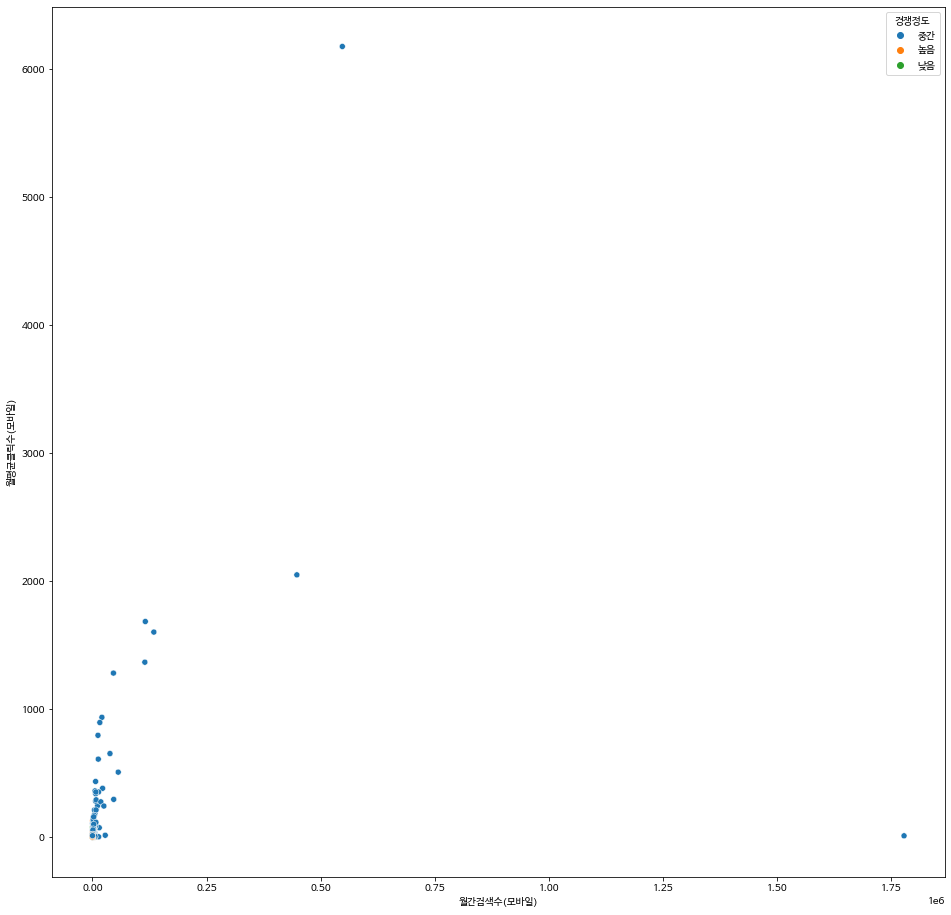

In [8]:
# 그래프를 출력할 때 필요한 설정을 해주는 matplotlib.pyplot을 불러옵니다.
import matplotlib.pyplot as plt
# scatterplot을 그려주는 라이브러리인 seaborn을 불러옵니다.
import seaborn as sns

# 출력할 plot의 크기를 정해줍니다. 16 x 16의 크기로 지정합니다.
plt.figure(figsize=(16, 16))
# 위에서 입력받은 x, y, hue를 기준으로 scatterplot을 그립니다.
sns.scatterplot(data=data, x=x, y=y, hue=hue)
# plot을 출력합니다.
plt.show()